# Visualizing MeDAL Dataset

Here we look at the just a subset of the entire MeDAL dataset found in "train.csv". We examine the 

1. Distribution of length of text entries later sent to the neural network models
2. Distribution of number of abbreviations (ABBVs) used in each unique text entry
3. Distribution of how often each ABBV occurs in the dataset

In [13]:
import os, pickle
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

PATH = 'data/metal-emnlp/pretrain_subset/'

In [2]:
train = pd.read_csv(PATH + "train.csv")

In [5]:
train.head()

,ABSTRACT_ID,TEXT,LOCATION,LABEL
0,14145090,velvet antlers vas are commonly used in tradit...,63,transverse aortic constriction
1,1900667,the clinical features of our cases demonstrate...,85,hodgkins lymphoma
2,8625554,ceftobiprole bpr is an investigational cephalo...,90,methicillinsusceptible s aureus
3,8157202,we have taken a basic biologic RPA to elucidat...,26,parathyroid hormonerelated protein
4,6784974,lipoperoxidationderived aldehydes for example ...,157,lipoperoxidation
...,...,...,...,...
2999995,10674546,the results of a surveillance study conducted ...,99,argon plasma coagulation
2999996,15628733,approximately of patients with celiac disease ...,12,glutenfree diet
2999997,15419189,the LT survivorship and PET outcomes of the mo...,15,unicompartmental knee arthroplasty
2999998,2075862,previous work has demonstrated the presence of...,60,complete


In [31]:
IDs = train["ABSTRACT_ID"]
uni_IDs = np.unique(IDs);
Labels = train["LABEL"];
uni_labels = np.unique(Labels)

In [59]:
text_len = [];
num_abbvs = [];
abbvs = [];
locations = train["Lo"]

for ID in uni_IDs[len(text_len):]:
    lines = train.loc[train["ABSTRACT_ID"] == ID];
    num_abbvs.append(len(lines));
    text_lines =  lines["TEXT"].to_numpy()[0].split()
    text_len.append(len(text_lines));

In [85]:
counts, bins = np.histogram(text_len_ray, bins=100)

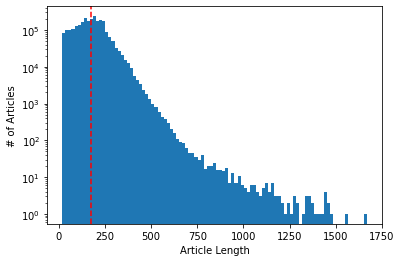

In [127]:
plt.hist(text_len_ray, bins=bins[1:]);
plt.axvline(np.mean(text_len_ray), color = 'r', ls='--');
plt.xlabel('Article Length')
plt.ylabel(r'# of Articles')

plt.semilogy()

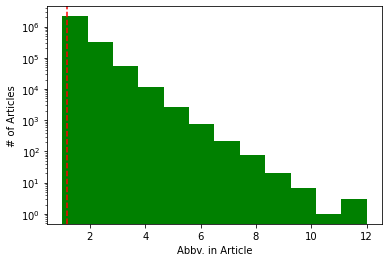

In [131]:
plt.hist(num_abv_ray, bins=12, color='g');
plt.axvline(np.mean(num_abv_ray), color = 'r', ls='--');
plt.xlabel('Abbv. in Article')
plt.ylabel(r'# of Articles')

plt.semilogy()

In [10]:
abbvs = [];
locations = train["LOCATION"];
texts = train["TEXT"];

for i in range(len(locations)):
    text_ray = texts[i].split()
    abbvs.append(text_ray[locations[i]]);
    #print(text_ray[locations[i]]);

In [14]:
words = abbvs;

keys = Counter(words).keys() # equals to list(set(words))
occurences = list(Counter(words).values()) # counts the elements' frequency

[]

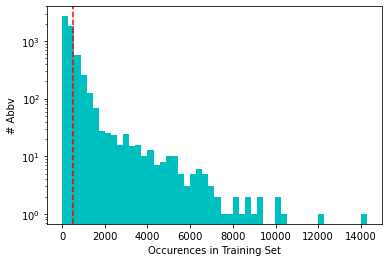

In [17]:
plt.hist(occurences, bins=50, color='c');
plt.axvline(np.mean(occurences), color = 'r', ls='--');
plt.xlabel('Occurences in Training Set')
plt.ylabel(r'# Abbv')

plt.semilogy()

# Reducing Initial MeDAL Data

Initial MeDAL data is too large for training new models. We will simply take some of the most occuring abbreviations as found in the training set of data and extract entries with occurances greater than some arbitrary [CUTOFF]. The cutoff is then applied to reduce the data by extracting only 'TEXT' and 'LABEL' entries that fall into this new list of abbreviations. This has the benefit of reducing the data set and also actively biases abbreviations with the largest number of expansions and intuitively those with the greatest entropy.

In [20]:
text_list = train["TEXT"];
location_list = train["LOCATION"];
abbvs = []

for i in range(len(location_list)):
    abbvs.append(text_list[i].split()[location_list[i]])

In [22]:
len(values[np.where(counts > 2500)[0]])

177

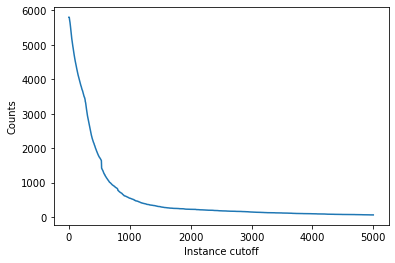

In [42]:
cutoffs = np.arange(0, 2000, 1);

size = 5000;

above_val = np.zeros([size]);
steps = np.arange(0, size, 1);
for step in steps:
    above_val[step] = len(values[np.where(counts > step)[0]])

plt.plot(above_val);
#plt.plot(above_val2);
plt.xlabel(r'Instance cutoff');
plt.ylabel(r'Counts');

(Above) Data shows the number of abbreviations that occur more than Instance Cutoff number of times. We see that of the original ~6k ABBVs, almost half of them occur only 

In [23]:
abbvs = np.array(abbvs);
values, counts = np.unique(abbvs, return_counts=True)

In [24]:
values_2500 = values[np.where(counts > 2500)[0]]

redux_abbv_index = [abbvs[i] in values_2500 for i in range(len(abbvs))];

In [26]:
new_train_25 = train[redux_abbv_index]
#new_train_25.to_csv(PATH + "train_2500.csv")

In [34]:
print("Reduced length of total data from %0.1d to %0.1d." % (len(train), len(new_train_25)))
print("Reduced length of total data by %0.2f percent \n" % (100 - len(new_train_25) / len(train) * 100))
print("Reduced number of ABBVs from %0.1d to %0.1d." % (len(values), len(values_2500)))
print("Reduced number of ABBVs by %0.2f percent \n" % (100 - len(values_2500) / len(values) * 100))

Reduced length of total data from 3000000 to 820885.
Reduced length of total data by 72.64 percent 

Reduced number of ABBVs from 5798 to 177.
Reduced number of ABBVs by 96.95 percent 



In [ ]:
test = pd.read_csv(PATH + "test.csv")
valid = pd.read_csv(PATH + "valid.csv")

In [122]:
text_list_test = test["TEXT"];
text_list_valid = valid["TEXT"];
location_list_test = test["LOCATION"];
location_list_valid = valid["LOCATION"];

abbvs_test = [];
abbvs_valid = [];

for i in range(len(location_list_test)):
    abbvs_test.append(text_list_test[i].split()[location_list_test[i]]);
    abbvs_valid.append(text_list_valid[i].split()[location_list_valid[i]]);


redux_abbv_index_test = [abbvs_test[i] in values_2500 for i in range(len(abbvs_test))];
redux_abbv_index_valid = [abbvs_valid[i] in values_2500 for i in range(len(abbvs_valid))];

new_test = test[redux_abbv_index_test]
#new_test.to_csv(PATH + "test_2500.csv");

273579


In [123]:
new_valid = valid[redux_abbv_index_valid];
new_valid.to_csv(PATH + "valid_2500.csv");

273554


In [35]:
uniques = new_train_25.LABEL.unique();
print("Number of unique labels in reduced set: %0.1d" % len(uniques))

Number of unique labels in reduced set: 4131


In [125]:
df = new_train_25
save = 'train_2500'
uniques = df.LABEL.unique();
texts = df.TEXT.to_numpy()
locs = df.LOCATION.to_numpy()
labels = df.LABEL.to_list()

indexes = [labels.index(x) for x in set(labels)]

dict_ray = np.zeros([len(uniques), 2], dtype=object);

i=0;
for index in indexes:
    AB = texts[index].split()[locs[index]];
    EX = labels[index];
    dict_ray[i] = AB, EX
    i+=1;

df = pd.DataFrame(dict_ray, columns = ['PREFERRED_AB','EXPANSION'])
df.sort_values(by=['PREFERRED_AB', "EXPANSION"]).to_csv(save + '_sort_AB_Exp.txt', sep='\t', index=False)